# Oil Price forcasting
Data driven Model
Implementation of other models and its performance

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pylab as plt
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

C:\Users\Anuja\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Read Dataset

In [2]:
data = pd.read_excel("RBRTE Data.xlsx")

In [3]:
data.head(10)

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63
5,1987-05-27,18.60
6,1987-05-28,18.60
7,1987-05-29,18.58
8,1987-06-01,18.65
9,1987-06-02,18.68


# Data Pre-processing

Observing above,  dataset is missing saturday and sunday value at index 2 & 3 also at index 7& 8.

In [4]:
data

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63
...,...,...
8906,2022-06-21,118.51
8907,2022-06-22,115.54
8908,2022-06-23,114.50
8909,2022-06-24,117.36


In [5]:
data.shape

(8911, 2)

In [6]:
data.isnull().sum()

Date     0
Price    0
dtype: int64

In [7]:
data.dtypes

Date     datetime64[ns]
Price           float64
dtype: object

In [9]:
data1=data.copy()

In [10]:
data1

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63
...,...,...
8906,2022-06-21,118.51
8907,2022-06-22,115.54
8908,2022-06-23,114.50
8909,2022-06-24,117.36


In [11]:
data1.head()

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


In [12]:
data1.set_index('Date', inplace=True)

In [13]:
data1.head()

,Price
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63


In [14]:
#Resample values of saturday and sunday with prvious day price
data2 = data1.resample('D').ffill().reset_index()

In [ ]:
# resampling is done daywise. Here upsampling means adding missing day values is done.

In [15]:
data2.head(10)

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-23,18.55
4,1987-05-24,18.55
5,1987-05-25,18.60
6,1987-05-26,18.63
7,1987-05-27,18.60
8,1987-05-28,18.60
9,1987-05-29,18.58


In [16]:
data2.isnull().sum()

Date     0
Price    0
dtype: int64

In [17]:
data2.describe()

,Price
count,12823.000000
mean,47.971713
std,32.716123
min,9.100000
25%,19.000000
50%,37.150000
75%,69.360000
max,143.950000


In [18]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12823 entries, 0 to 12822
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    12823 non-null  datetime64[ns]
 1   Price   12823 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 200.5 KB


In [19]:
#Due to resampling values for saturday and sunday is added in the data2 dataset. Originally it was 8911 rows × 2 columns for data1

data2.shape

(12823, 2)

In [16]:
Train = data2.head(10000)
Test = data2.tail(2823)

In [17]:
Train

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-23,18.55
4,1987-05-24,18.55
...,...,...
9995,2014-09-30,94.67
9996,2014-10-01,94.57
9997,2014-10-02,91.29
9998,2014-10-03,90.80


In [18]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [19]:
ses_model = SimpleExpSmoothing(Train["Price"]).fit(smoothing_level=0.8)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Price) 

67.28113197943807

# Holt method

In [20]:
# Holt method 
hw_model = Holt(Train["Price"]).fit(smoothing_level=0.8, smoothing_slope=0.8)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Price) 

C:\Users\admin\AppData\Local\Temp/ipykernel_14112/2304287541.py:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  hw_model = Holt(Train["Price"]).fit(smoothing_level=0.8, smoothing_slope=0.8)


879.6686813414049

# Holts winter exponential smoothing with additive seasonality and additive trend

In [21]:
hwe_model_add_add = ExponentialSmoothing(Train["Price"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Price) 

from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(Test.Price, pred_hwe_add_add))
print('RMSE withHolts approach : ', rms)

RMSE withHolts approach :  43.83436871062835


# Final Model by combining train and test

<AxesSubplot:>

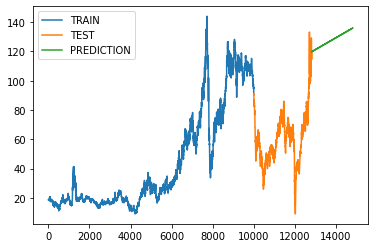

In [22]:
hwe_model_add_add = ExponentialSmoothing(data2["Price"],seasonal="add",trend="add",seasonal_periods=12).fit()
Forecast1=hwe_model_add_add.forecast(2000)
Train['Price'].plot(legend=True,label='TRAIN')
Test['Price'].plot(legend=True,label='TEST',figsize=(6,4))
Forecast1.plot(legend=True,label='PREDICTION')


In [23]:
#Forecasting for next 10 time periods
hwe_model_add_add.forecast(2000)

12823    119.679418
12824    119.712781
12825    119.752775
12826    119.737345
12827    119.775042
            ...    
14818    135.838750
14819    135.876447
14820    135.879717
14821    135.879075
14822    135.890055
Length: 2000, dtype: float64

# 1. Naive Approach

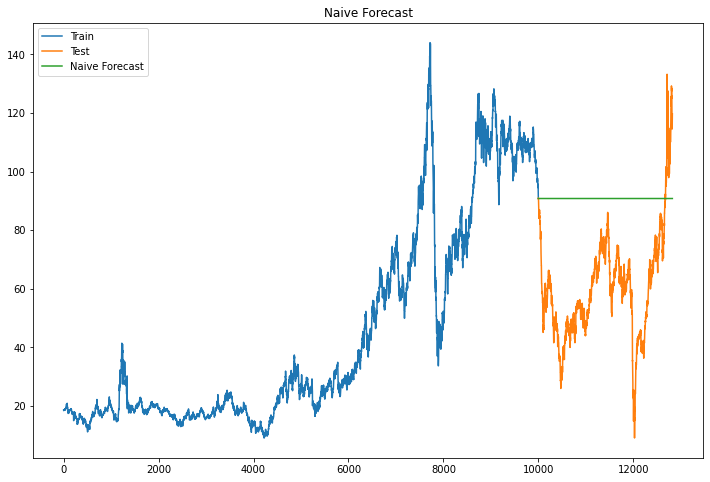

In [24]:
dd= np.asarray(Train.Price)
y_hat = Test.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(Train.index, Train['Price'], label='Train')
plt.plot(Test.index,Test['Price'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.savefig('time-series-naive-approach.png')

In [25]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(Test.Price, y_hat.naive))
print('RMSE with naive approach : ', rms)

RMSE with naive approach :  35.34757562629647


In [26]:
MAP=MAPE(Test.Price, y_hat.naive) 
print('Mean Absolute Percentage Error(MAPE)with naive approach : ',MAP)

Mean Absolute Percentage Error(MAPE)with naive approach :  35.61870631580426


# 2 Simple Average

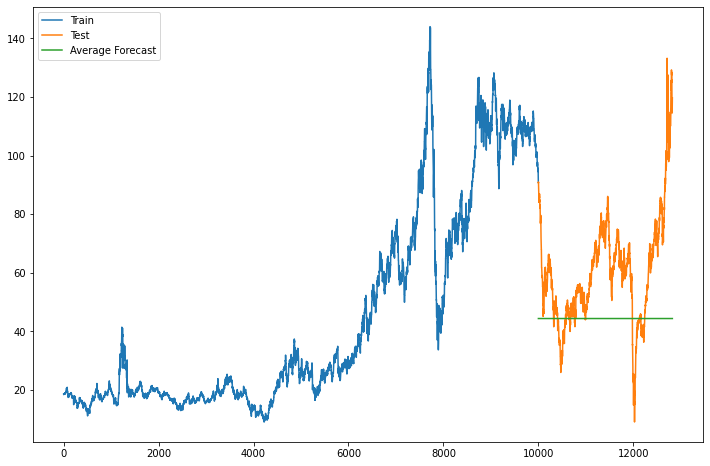

In [27]:
y_hat_avg = Test.copy()
y_hat_avg['avg_forecast'] = Train['Price'].mean()
plt.figure(figsize=(12,8))
plt.plot(Train['Price'], label='Train')
plt.plot(Test['Price'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()


In [28]:
rms = sqrt(mean_squared_error(Test.Price, y_hat_avg.avg_forecast))
print(rms)

24.497847298368303


In [29]:
MAP=MAPE(Test.Price, y_hat_avg.avg_forecast) 
print('Mean Absolute Percentage Error(MAPE)with Simple Average approach : ',MAP)


Mean Absolute Percentage Error(MAPE)with Simple Average approach :  42.026909007821786


# 3. Moving Average

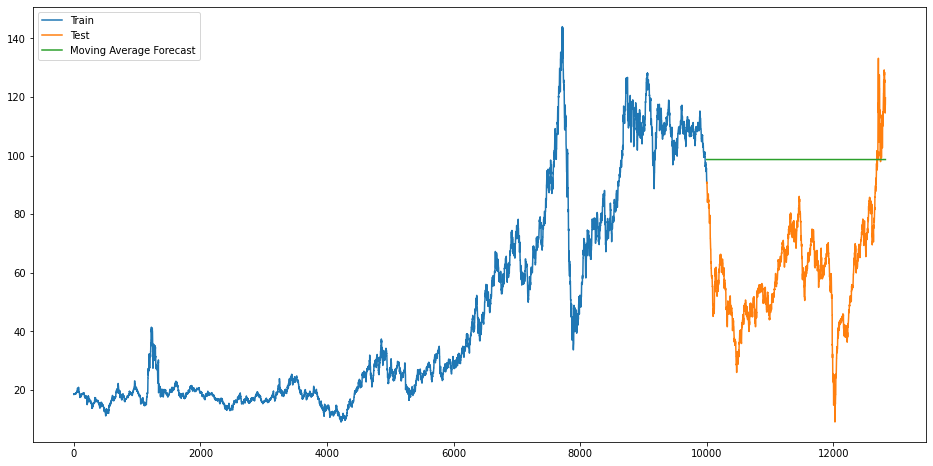

In [30]:
y_hat_avg = Test.copy()
y_hat_avg['moving_avg_forecast'] = Train['Price'].rolling(60).mean().iloc[-1]
plt.figure(figsize=(16,8))
plt.plot(Train['Price'], label='Train')
plt.plot(Test['Price'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

In [31]:
rms = sqrt(mean_squared_error(Test.Price, y_hat_avg.moving_avg_forecast))
print(rms)

42.23689840797574


In [32]:
MAP=MAPE(Test.Price, y_hat_avg.moving_avg_forecast)
print('Mean Absolute Percentage Error(MAPE)with Moving Average Approach : ',MAP)

Mean Absolute Percentage Error(MAPE)with Moving Average Approach :  39.939930764148734


# 4.Simple Exponential Smoothing

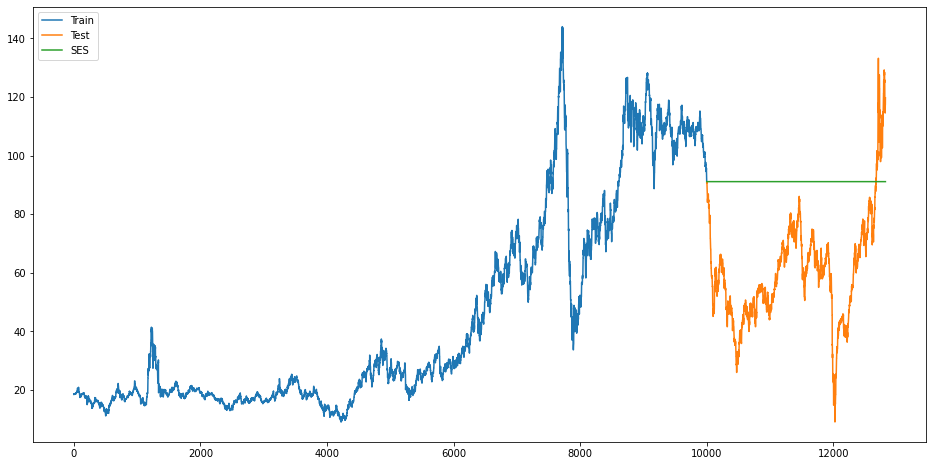

In [33]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = Test.copy()
fit2 = SimpleExpSmoothing(np.asarray(Train['Price'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(Test))
plt.figure(figsize=(16,8))
plt.plot(Train['Price'], label='Train')
plt.plot(Test['Price'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

In [34]:
rms = sqrt(mean_squared_error(Test.Price, y_hat_avg.SES))
print(rms)

35.60322791252753


In [35]:
MAP=MAPE(Test.Price, y_hat_avg.SES)
print('Mean Absolute Percentage Error(MAPE)with Simple Expoential Smoothing Approach : ',MAP)

Mean Absolute Percentage Error(MAPE)with Simple Expoential Smoothing Approach :  35.79475541478129


# 5.Holt’s Linear Trend method

C:\Users\admin\AppData\Local\Temp/ipykernel_14112/2020682602.py:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(np.asarray(Train['Price'])).fit(smoothing_level = 0.9,smoothing_slope = 0.6)


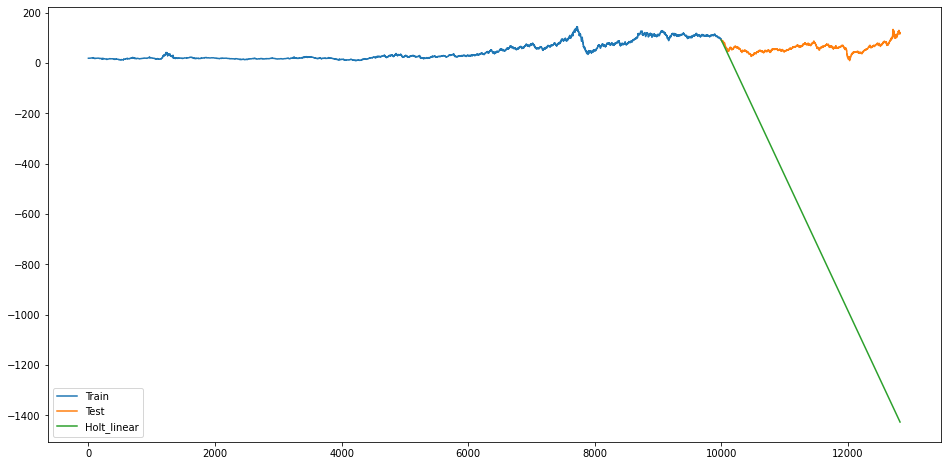

In [36]:
y_hat_avg = Test.copy()

fit1 = Holt(np.asarray(Train['Price'])).fit(smoothing_level = 0.9,smoothing_slope = 0.6)
y_hat_avg['Holt_linear'] = fit1.forecast(len(Test))

plt.figure(figsize=(16,8))
plt.plot(Train['Price'], label='Train')
plt.plot(Test['Price'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [37]:
rms = sqrt(mean_squared_error(Test.Price, y_hat_avg.Holt_linear))
print(rms)

854.3706211002748


In [38]:
MAP=MAPE(Test.Price, y_hat_avg.Holt_linear)
print('Mean Absolute Percentage Error(MAPE)with Holts Linear Trend Approach : ',MAP)

Mean Absolute Percentage Error(MAPE)with Holts Linear Trend Approach :  153.87648376339598


# 6.Holt-Winters Method

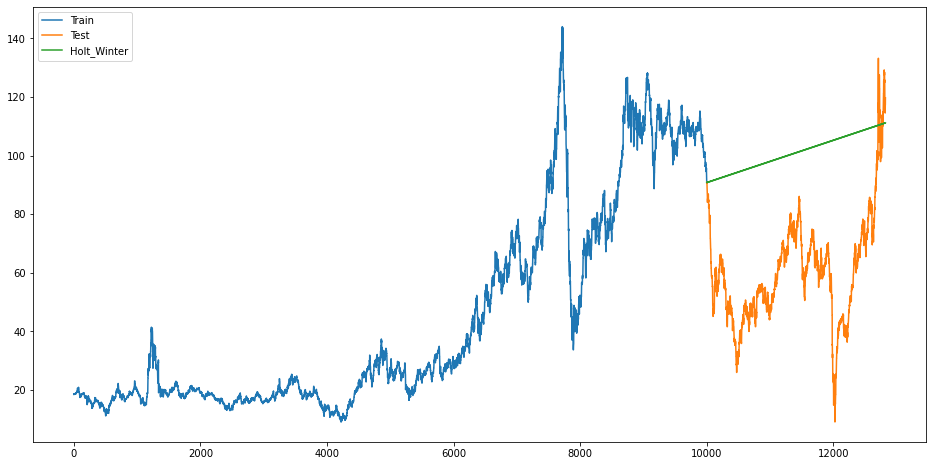

In [39]:
y_hat_avg = Test.copy()
fit1 = ExponentialSmoothing(np.asarray(Train['Price']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(Test))
plt.figure(figsize=(16,8))
plt.plot( Train['Price'], label='Train')
plt.plot(Test['Price'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [41]:
rms = sqrt(mean_squared_error(Test.Price, y_hat_avg.Holt_Winter))
print(rms)

43.6841592861785


In [42]:
MAP=MAPE(Test.Price, y_hat_avg.Holt_Winter)
print('Mean Absolute Percentage Error(MAPE)with Holts winter Approach : ',MAP)

Mean Absolute Percentage Error(MAPE)with Holts winter Approach :  40.640682273210324


# 7. SARIMA

In [47]:
import statsmodels.api
import statsmodels as sm
import statsmodels.api as sm

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


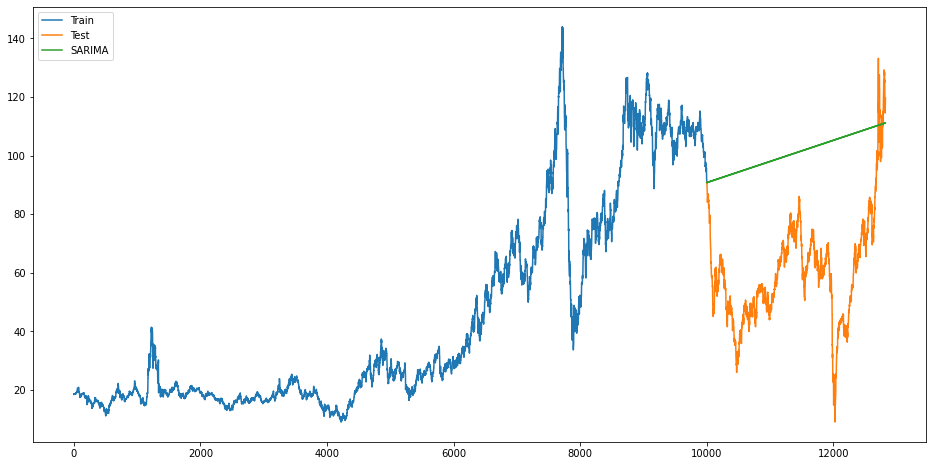

In [48]:
y_hat_avg = Test.copy()
fit1 = sm.tsa.statespace.SARIMAX(Train.Price, order=(1, 1, 1),seasonal_order=(0,1,1,7)).fit()
y_hat_avg['SARIMA'] = fit1.predict(start=10000, end=15000, dynamic=True)
plt.figure(figsize=(16,8))
plt.plot( Train['Price'], label='Train')
plt.plot(Test['Price'], label='Test')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()

In [49]:
rms = sqrt(mean_squared_error(Test.Price, y_hat_avg.SARIMA))
print(rms)

43.67496372992959


In [50]:
MAP=MAPE(Test.Price, y_hat_avg.SARIMA)
print('Mean Absolute Percentage Error(MAPE)with SARIMA Approach : ',MAP)

Mean Absolute Percentage Error(MAPE)with SARIMA Approach :  40.63543972583335


# 8 ARIMA

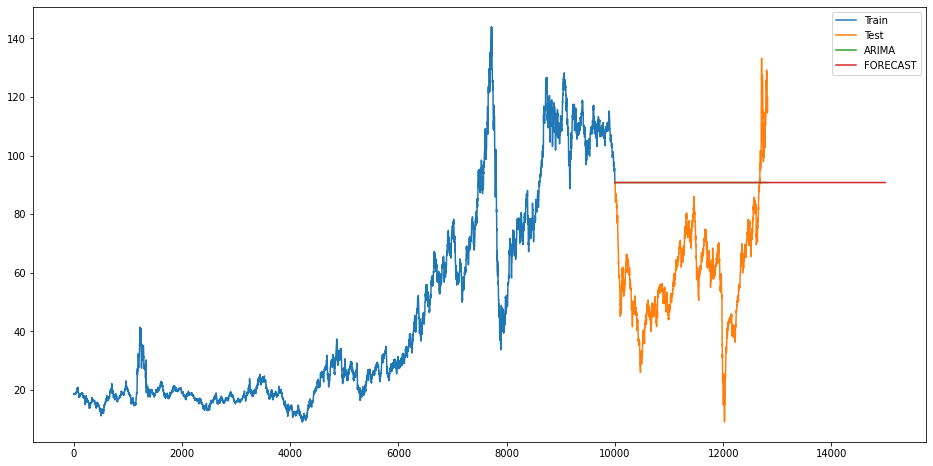

In [68]:
import statsmodels.api as smapi

model = smapi.tsa.arima.ARIMA(Train.Price, order=(1, 1, 1))
results_AR = model.fit() 
y_hat_avg['ARIMA'] = results_AR.predict(start=10000, end=15000, dynamic=True)
forecast=results_AR.forecast(steps=5000)
plt.figure(figsize=(16,8))
plt.plot( Train['Price'], label='Train')
plt.plot(Test['Price'], label='Test')
plt.plot(y_hat_avg['ARIMA'], label='ARIMA')
plt.plot(forecast,label='FORECAST')
plt.legend(loc='best')
plt.show()


In [65]:
forecast=results_AR.forecast(steps=2000)

In [66]:
forecast

10000    90.781080
10001    90.799684
10002    90.781391
10003    90.799378
10004    90.781692
           ...    
11995    90.790460
11996    90.790460
11997    90.790460
11998    90.790460
11999    90.790460
Name: predicted_mean, Length: 2000, dtype: float64

In [52]:
rms = sqrt(mean_squared_error(Test.Price, y_hat_avg.ARIMA))
print(rms)

35.3394267052316


In [53]:
MAP=MAPE(Test.Price, y_hat_avg.ARIMA)
print('Mean Absolute Percentage Error(MAPE)with ARIMA Approach : ',MAP)

Mean Absolute Percentage Error(MAPE)with ARIMA Approach :  35.61309308844285


In [63]:
y_hat_avg.ARIMA

10000    90.781080
10001    90.799684
10002    90.781391
10003    90.799378
10004    90.781692
           ...    
12818    90.790460
12819    90.790460
12820    90.790460
12821    90.790460
12822    90.790460
Name: ARIMA, Length: 2823, dtype: float64

# Performance Evaluation of all Models
                                     RME                 MAPE
1.Naive Method --                35.3475756262964     35.618706315804154

2.Simple Average--               24.497847298368146   42.02690900782129

3.Moving Average-                42.23689840797574    39.93993076414876

4.Simple Exponential Smoothing-- 35.60322791252753    35.79475541478135

5.Holt’s Linear Trend method--   854.3706211002748    153.87648376339607

6.Holt-Winters Method--          43.66278819420399    40.62917677521179

7.SARIMA ---                    43.67466052366494    40.635274423588754

8.ARIMA---                      35.33942303949844    35.61309056278416

| Sr.No.| Model Name | RME | MAPE |
| --- | --- | --- |---|
| 1. | Naive Method                |35.3475756262964    |35.618706315804154|
| 2. | Simple Average              |24.497847298368146  |42.02690900782129|
| 3. |Moving Average               |  42.23689840797574 |39.93993076414876|
| 4. | Simple Exponential Smoothing|35.60322791252753   |35.79475541478135|
| 5. |Holt’s Linear Trend method   |854.3706211002748   |153.87648376339607|
| 6. |Holt-Winters Method          |43.66278819420399   |40.62917677521179|
| 7. |SARIMA                       |43.67466052366494   |40.635274423588754|
| 8. |ARIMA                        |35.33942303949844   |35.61309056278416|